1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

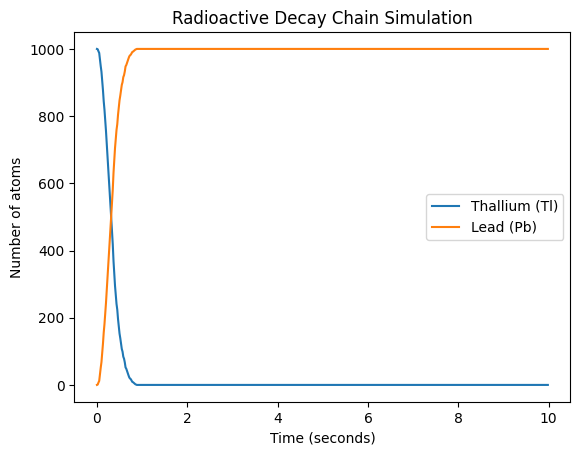

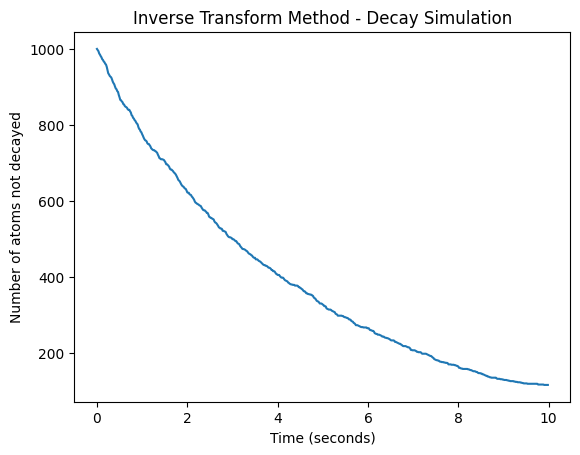

In [10]:
import matplotlib.pyplot as plt
import numpy as np

#given values
tau = 3.052 
total_time = 10
time_steps = total_time * 60
initial_Tl_atoms = 1000
initial_Pb_atoms = 0
time_points = np.arange(0, total_time, 1/60) #1 second time steps
Tl_atoms = [initial_Tl_atoms]
Pb_atoms = [initial_Pb_atoms]

for t in range(1, time_steps + 1):

    prob_decay = 1 - 2**(-t / (60 * tau))
    decayed_atoms = np.random.binomial(Tl_atoms[-1], prob_decay)
    
    Tl_atoms.append(Tl_atoms[-1] - decayed_atoms)
    Pb_atoms.append(Pb_atoms[-1] + decayed_atoms)

Pb_atoms = Pb_atoms[:-1]
Tl_atoms = Tl_atoms[:-1]

plt.plot(time_points, Tl_atoms, label='Thallium (Tl)')
plt.plot(time_points, Pb_atoms, label='Lead (Pb)')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms')
plt.legend()
plt.title('Radioactive Decay Chain Simulation')
plt.show()

#inverse transform method
random_numbers = np.random.rand(initial_Tl_atoms)
decay_times = -tau * np.log(1 - random_numbers) / np.log(2)
decay_times.sort()

not_decayed_atoms = [initial_Tl_atoms - np.searchsorted(decay_times, t, side='right') for t in time_points]

plt.plot(time_points, not_decayed_atoms)
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms not decayed')
plt.title('Inverse Transform Method - Decay Simulation')
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Hit/Miss method:
Estimated Integral: 1.3482
Mean Value of Integrals: 1.3468176
Standard Deviation (rescaled): 0.000290837750020242

Mean Value method:
Estimated Integral: 1.346860718889391
Mean Value of Integrals: 1.3469917535278901
Standard Deviation (rescaled): 0.00020980444090156253


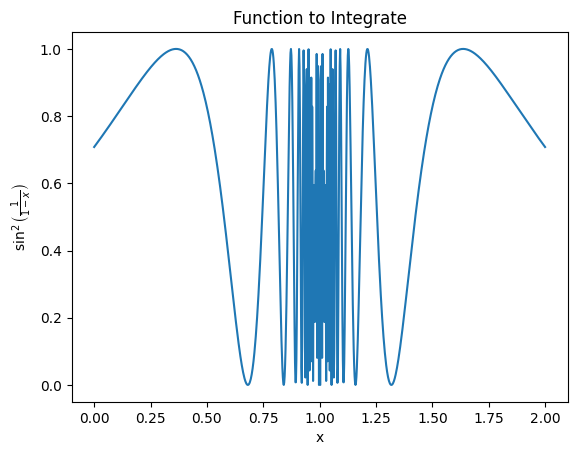

In [11]:
def f(x):
    return np.sin(1 / (1 - x))**2

#given values
a, b = 0, 2
N = 10000
x_random = np.random.uniform(a, b, N)
y_random = np.random.uniform(0, 1, N)

hits = np.sum(y_random < f(x_random))
integral_hit_miss = (hits / N) * (b - a)

#error analysis
integral_values_hit_miss = np.zeros(1000)
for i in range(1000):
    x_random = np.random.uniform(a, b, N)
    y_random = np.random.uniform(0, 1, N)
    hits = np.sum(y_random < f(x_random))
    integral_values_hit_miss[i] = (hits / N) * (b - a)

mean_value_hit_miss = np.mean(integral_values_hit_miss)
std_dev_hit_miss = np.std(integral_values_hit_miss, ddof=1)

#mean Value method
x_mean_value = np.random.uniform(a, b, N)
integral_mean_value = (b - a) * np.mean(f(x_mean_value))

#error analysis
integral_values_mean_value = np.zeros(1000)
for i in range(1000):
    x_mean_value = np.random.uniform(a, b, N)
    integral_values_mean_value[i] = (b - a) * np.mean(f(x_mean_value))

mean_value_mean_value = np.mean(integral_values_mean_value)
std_dev_mean_value = np.std(integral_values_mean_value, ddof=1)

# Print results
print("Hit/Miss method:")
print("Estimated Integral:", integral_hit_miss)
print("Mean Value of Integrals:", mean_value_hit_miss)
print("Standard Deviation (rescaled):", std_dev_hit_miss / np.sqrt(1000))

print("\nMean Value method:")
print("Estimated Integral:", integral_mean_value)
print("Mean Value of Integrals:", mean_value_mean_value)
print("Standard Deviation (rescaled):", std_dev_mean_value / np.sqrt(1000))

x_vals = np.linspace(a, b, 1000)
plt.plot(x_vals, f(x_vals))
plt.title('Function to Integrate')
plt.xlabel('x')
plt.ylabel(r'$\sin^2\left(\frac{1}{1-x}\right)$')
plt.show()

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

2D case (Unit Circle):
Estimated Area: 3.16

10D case (Unit Sphere):
Estimated Volume: 0.0


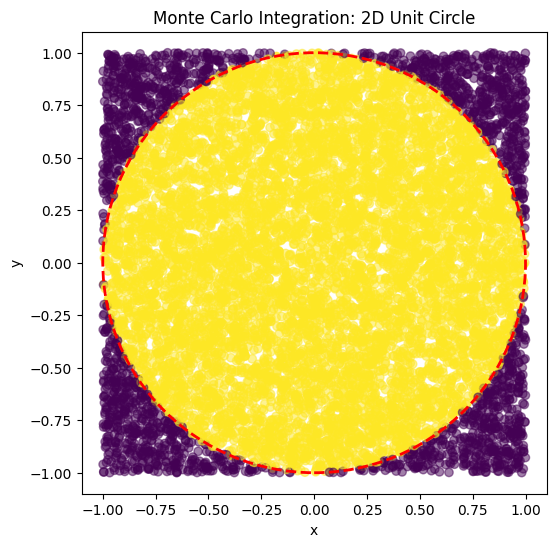

In [12]:
#circle function
def f_circle(x, y):
    return (x**2 + y**2) <= 1

#10D sphere function
def f_sphere(x):
    return np.sum(x**2) <= 1

N = 10000
#circle case
x_random_2d = np.random.uniform(-1, 1, (N, 2))
hits_2d = np.sum(f_circle(x_random_2d[:, 0], x_random_2d[:, 1]))
area_estimate_2d = (hits_2d / N) * 4 

#10D case
x_random_10d = np.random.uniform(-1, 1, (N, 10))
hits_10d = np.sum(f_sphere(x_random_10d))
volume_estimate_10d = (hits_10d / N) * 2**10

print("2D case (Unit Circle):")
print("Estimated Area:", area_estimate_2d)

print("\n10D case (Unit Sphere):")
print("Estimated Volume:", volume_estimate_10d)

plt.figure(figsize=(6, 6))
plt.scatter(x_random_2d[:, 0], x_random_2d[:, 1], c=f_circle(x_random_2d[:, 0], x_random_2d[:, 1]), cmap='viridis', alpha=0.5)
circle = plt.Circle((0, 0), 1, color='r', fill=False, linestyle='--', linewidth=2)
plt.gca().add_patch(circle)
plt.title('Monte Carlo Integration: 2D Unit Circle')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

Integral result: 0.42042761217718555


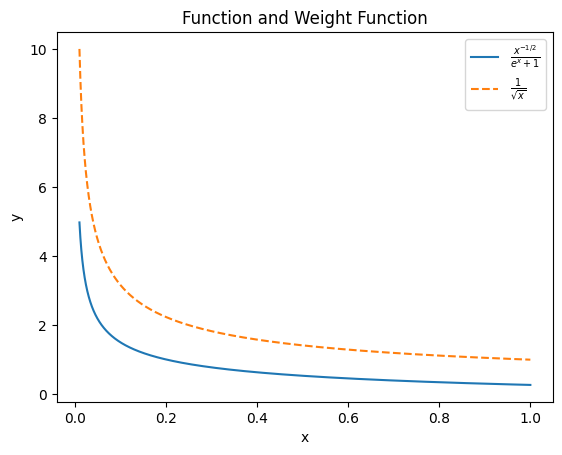

In [13]:
def f(x):
    return x**(-0.5) / (np.exp(x) + 1)

def w(x):
    return 1 / np.sqrt(x)

N = 10000

x_samples = np.random.random(N)**2  
integral_estimate = np.mean(f(x_samples) / w(x_samples))
print("Integral result:", integral_estimate)

x_vals = np.linspace(0.01, 1, 10000)
plt.plot(x_vals, f(x_vals), label=r'$\frac{x^{-1/2}}{e^x+1}$')
plt.plot(x_vals, w(x_vals), label=r'$\frac{1}{\sqrt{x}}$', linestyle='--')
plt.title('Function and Weight Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
